In [1]:
import pandas as pd

import decomposition
import potential_data
import scaler
import plots
import fit

pd.options.mode.chained_assignment = None

In [2]:
#for SU(3) gluodynamics make decomposition, show mon+mod, fit original and show linear and coulomb parts shifted
def potential_decomposition(beta, size, decomp_params, fit_range):
    path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{size}/beta{beta}'
    paths = {'original': {'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'parameters': {'name': 'SU3'}},
            'monopole': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopole.csv', 'parameters': {'name': 'mon'}, 'constraints': {'T': (fit_range[1]-1, fit_range[1]-1)}},
            'monopoless': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopoless.csv', 'parameters': {'name': 'mod'}, 'constraints': {'T': (8, 8)}}}
    r0 = scaler.get_r0(beta)
    fit_range = tuple([r0*x for x in fit_range])
    data = potential_data.DataDecomposition(paths)
    data.fit_original_T((2, 8), ['name'])
    data.scale_potentials(r0)
    data.find_sum('monopole', 'monopoless')
    data.df = data.df.drop('T', axis = 1)
    fitting_info = {'original': {'fit_range': fit_range, 'fit_func': fit.func_quark_potential, 'fit_parameters': ['V0', 'alpha', 'sigma']}}
    df_fits = fit.fit_potentials(data.df, fitting_info)
    fit_params_original = fit.make_fit(data.df.loc[data.df['potential_type'] == 'original', ['r/a','aV(r)', 'err']], fit_range, fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err')
    fit_shifted = fit.fit_from_original(data.df, 'monopole', fit.func_linear, [fit_params_original.loc[0, 'sigma']])
    df_fits = pd.concat([fit_shifted, df_fits])
    fit_shifted = fit.fit_from_original(data.df, 'monopoless', fit.func_coloumb, [fit_params_original.loc[0, 'alpha']])
    df_fits = pd.concat([fit_shifted, df_fits])
    image_path = '../../images/potential/decomposition/su3/gluodynamics'
    image_name = f'potential_decomposition_beta{beta}'
    image_name = image_name.replace('.', 'p')
    plots.plot_potential_single(data.df, 'r/a', 'aV(r)', 'err', 'name', r'$r/r_{0}$', r'$r_{0}V(r)$', r'potential decomposition $\beta=$' + f'{beta}', image_path, image_name, True, df_fits=df_fits)

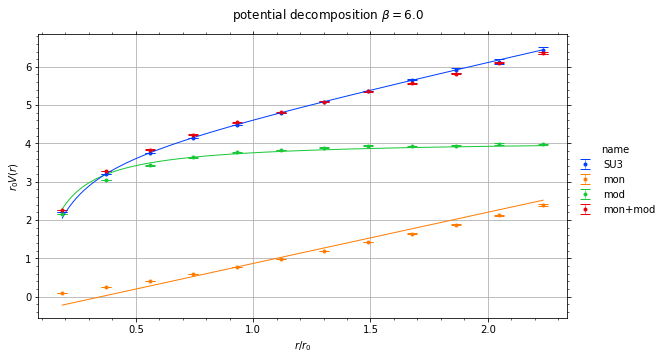

../../images/potential/decomposition/su3/gluodynamics/potential_decomposition_beta6p0


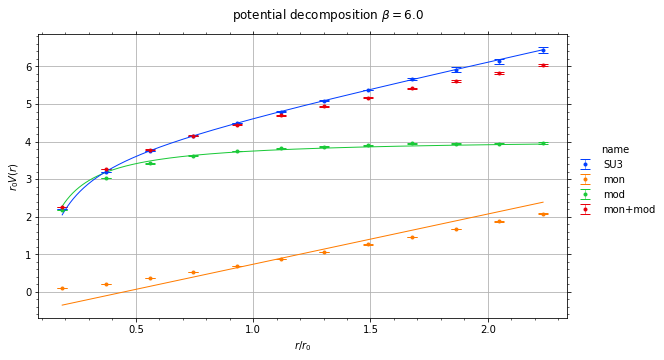

../../images/potential/decomposition/su3/gluodynamics/potential_decomposition_beta6p0


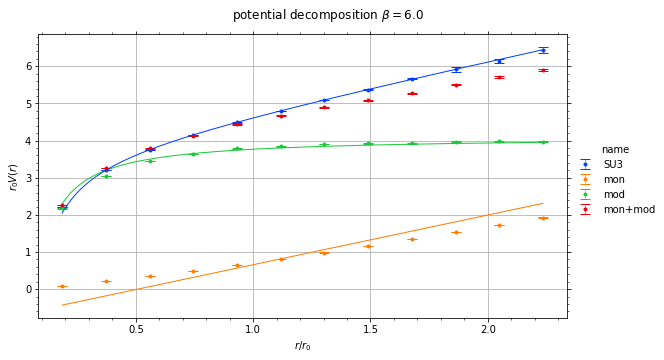

../../images/potential/decomposition/su3/gluodynamics/potential_decomposition_beta6p0


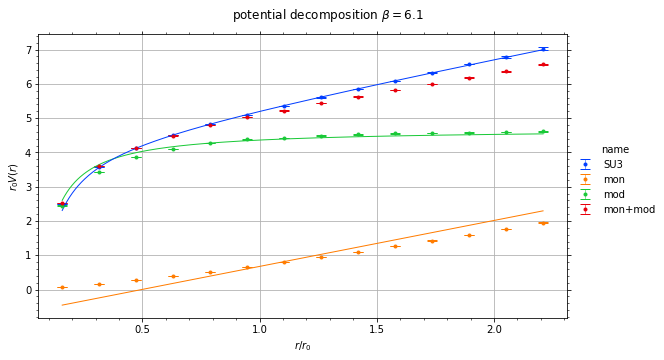

../../images/potential/decomposition/su3/gluodynamics/potential_decomposition_beta6p1


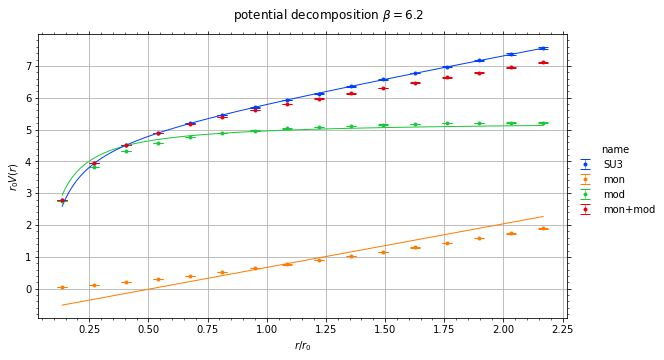

../../images/potential/decomposition/su3/gluodynamics/potential_decomposition_beta6p2


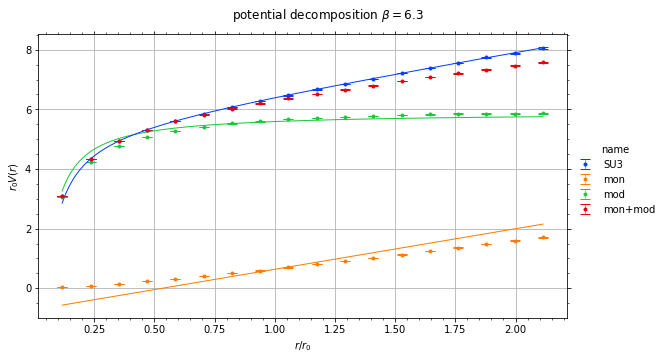

../../images/potential/decomposition/su3/gluodynamics/potential_decomposition_beta6p3


In [3]:
potential_decomposition(6.0, '24^4', 'steps_0/copies=1', (2, 12))
potential_decomposition(6.0, '24^4', 'steps_2/copies=1', (2, 12))
potential_decomposition(6.0, '24^4', 'steps_500/copies=4', (2, 12))
potential_decomposition(6.1, '28^4', 'steps_500/copies=3', (2, 14))
potential_decomposition(6.2, '32^4', 'steps_500/copies=3', (2, 16))
potential_decomposition(6.3, '36^4', 'steps_500/copies=4', (2, 18))

In [6]:
#relative deviation of potential decomposition
def relative_deviation_single(beta, size, decomp_params, fit_range):
    path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{size}/beta{beta}'
    paths = {'original': {'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'parameters': {'name': 'SU3', 'beta': beta}},
            'monopole': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopole.csv', 'parameters': {'name': 'mon', 'beta': beta}, 'constraints': {'T': (fit_range[1]-1, fit_range[1]-1)}},
            'monopoless': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopoless.csv', 'parameters': {'name': 'mod', 'beta': beta}, 'constraints': {'T': (8, 8)}}}
    r0 = scaler.get_r0(beta)
    fit_range = tuple([r0*x for x in fit_range])
    data = potential_data.DataDecomposition(paths)
    data.fit_original_T((2, 8), ['name', 'beta'])
    data.scale_potentials(r0)
    data.find_sum('monopole', 'monopoless')
    data.remove_from_plot(['monopole', 'monopoless'])
    data.find_difference('original', 'monopole+monopoless')
    data.remove_from_plot(['monopole+monopoless'])
    data.find_ratio('original-monopole+monopoless', 'original')
    data.remove_from_plot(['original-monopole+monopoless', 'original'])
    data.df.loc[data.df['potential_type'] == 'original-monopole+monopoless', 'name'] = 'relative deviation'
    data.df = data.df.drop('T', axis = 1)
    return data.df

def relative_deviation(params):
    df = []
    for par in params:
        df.append(relative_deviation_single(*par))
    df = pd.concat(df)
    image_path = '../../images/potential/decomposition_relative_deviation/su3/gluodynamics'
    image_name = f'decomposition_relative_deviation'
    plots.plot_potential_single(df, 'r/a', 'aV(r)', 'err', 'beta', r'$r/r_{0}$', r'$r_{0}V(r)$', r'relative deviation $\beta=$', image_path, image_name, True)

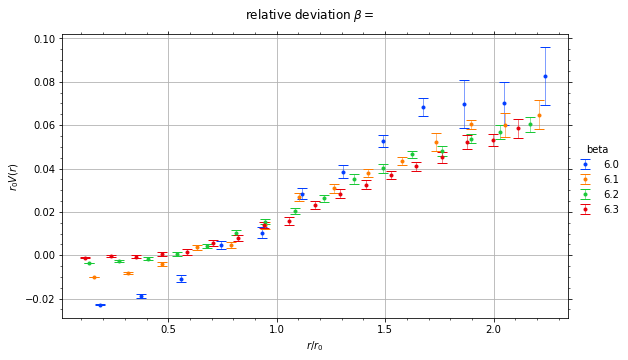

../../images/potential/decomposition_relative_deviation/su3/gluodynamics/decomposition_relative_deviation


In [7]:
params = [[6.0, '24^4', 'steps_500/copies=4', (2, 12)],
          [6.1, '28^4', 'steps_500/copies=3', (2, 14)],
          [6.2, '32^4', 'steps_500/copies=3', (2, 16)],
          [6.3, '36^4', 'steps_500/copies=4', (2, 18)]]
relative_deviation(params)

In [13]:
beta = 6.3
size = '36^4'
decomp_params = 'steps_500/copies=4'
fit_range = (2, 18)
relative_deviation_single(6.3, '36^4', 'steps_500/copies=4', (2, 18))

,r/a,aV(r),err,name,potential_type
0,0.117462,-0.001152,0.000166,SU3-mon+mod/SU3,original-monopole+monopoless/original
1,0.234923,-0.000565,0.000451,SU3-mon+mod/SU3,original-monopole+monopoless/original
2,0.352385,-0.000738,0.000786,SU3-mon+mod/SU3,original-monopole+monopoless/original
3,0.469846,0.000619,0.000975,SU3-mon+mod/SU3,original-monopole+monopoless/original
4,0.587308,0.001493,0.001196,SU3-mon+mod/SU3,original-monopole+monopoless/original
5,0.704769,0.005617,0.001276,SU3-mon+mod/SU3,original-monopole+monopoless/original
6,0.822231,0.008028,0.001436,SU3-mon+mod/SU3,original-monopole+monopoless/original
7,0.939692,0.013878,0.001475,SU3-mon+mod/SU3,original-monopole+monopoless/original
8,1.057154,0.015840,0.001714,SU3-mon+mod/SU3,original-monopole+monopoless/original
9,1.174615,0.023093,0.001721,SU3-mon+mod/SU3,original-monopole+monopoless/original
